# Perceptron and SVM

<a target="_blank" href="https://colab.research.google.com/github/GaiaSaveri/intro-to-ml/blob/main/notebooks/SOLVED-Lab-8.Perceptron_and_SVM.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as LA

## Dataset
We'll be using a binary data set in a 2-dimensional space where each point is labeled either 1 or -1 based on whether it falls above or below a straight line, whose equation is $y = ax+b$.

1. **Define a function which generates this set of data points.**

In [2]:
def binary(a, b, points, m, M, d):
    
    # create empty array of size (points, d), where each row represents a data point in d-dimensional space
    X = np.zeros((points,d))
    # create another empty array labels of size points, where each element represents the label of a data point (either 1 or -1)
    labels = np.zeros(points)
    
    # sample d-dimensional vectors uniformly from the range (m, M) 
    for i in range(points):
        X[i,:] = np.random.uniform(m, M, d)
    
    # For each data point, it computes the value of the function X[:,1]-a*X[:,0]-b, which represents the signed 
    # perpendicular distance of the point from the line.
    labels[X[:,1] - a*X[:,0] - b > 0] = 1 # above the line
    labels[X[:,1] - a*X[:,0] - b < 0] = -1 # below the line

    return X, labels    

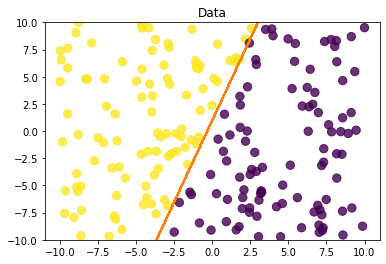

In [3]:
a = 3
b = 1
d = 2 # 2D
points = 200
m = -10
M = 10

X, labels = binary(a,b,points,m,M,d) # genero il dataset

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=70, c=labels, alpha=0.8)
ax.plot(X, a*X+b)
plt.ylim([m, M])
ax.set_title('Data')
plt.show()

## Perceptron online algorithm
The perceptron online algorithm is a binary classification algorithm that is used to train a linear classifier. It is a type of online learning algorithm, which means that it updates the model parameters after observing each training example, instead of waiting to see all the examples at once (as in batch learning).

Step-by-step explanation: 
1. Initialize the model parameters: The algorithm starts by setting the weights $w$ and bias $b$ to small random values. These weights define the hyperplane that separates the points.
2. Process each training example: For each training example (x, label), the algorithm does the following:
  -  Compute the predicted label: The algorithm computes the dot product of the weight vector $w$ and the feature vector $x$,  adds the bias term $b$, and applies the sign function to get the predicted label $y_{pred}=sgn(w^{T}x +b)$.
  - Update the model parameters: If the predicted label is incorrect, the algorithm updates the weight vector and bias term. This update rule adjusts the weight vector in the direction of the misclassified example to try to correctly classify it in future iterations, according to a learning rate $\eta$.
3. Repeat step 2 until convergence: The algorithm continues to process each training example, updating the model parameters as necessary, until it reaches a stopping criterion. One common stopping criterion is to stop after a fixed number of iterations or when the misclassification rate on a validation set falls below a certain threshold.
4. Return the learned model parameters: Once the algorithm has converged, it returns the final weight vector, which can be used to classify new examples by computing the dot product of the feature vector and weight vector, adding the bias term, and applying the sign function.



Pseudocode:

$$
\textrm{if}\;\; y_{i}(w^{T}x_{i} +b)<0\\
\textrm{then}\\ 
w_{t+1}=w_{t}+\eta y_{i}x_{i}\\
b_{t+1} = b_t + \eta y_i\\
\textrm{else}\\
w_{t+1}=w_{t} \\
b_{t+1} = b_t
$$


2. **Write an iteration of the Perceptron algorithm.**

Siccome si tratta di un algoritmo iterativo aggiorneremo i pesi di volta in volta. Perceptron è un algoritmo Online il chè significa che aggiorna i pesi ad ogni datapoint che riceve in ingresso. Ci arriva un nuovo punto e come prima cosa prediciamo la classe di questo punto assegnandogli un label. Siccome è un algoritmo lineare assegnamo i label facendo il prodotto scalare tra i pesi e l'input (coordinate del punto + bias) e guardiamo al SEGNO: se è >0 lo assegnamo alla classe positiva +1, altrimenti a quella negativa -1.  Essendo un algoritmo supervisionato noi sappiamo a quale classe appartiene in realtà il punto quindi possiamo aggiornare i pesi ogni volta che sbaglia. Dobbiamo scegliere anche una learnig rate che determina la velocità con cui convergiamo al Separatore lineare.  L'algorimto ritorna i pesi e il bias, che poi noi utilizzeremo nel test per fare predizioni.

In [5]:
def Perceptron(X, labels, eta):
    d = np.shape(X)[1] # capisco la dimensione dei dati

    # set the weights w to small random values. These weights define the hyperplane that separates the points
    W = np.zeros((d,points)) # creo matrice dove mettero i pesi
    W[:,0] = np.random.normal(0,1,d) # inizializzo la prima colonna con dei pesi random

    B = np.zeros(points) # vettore che mi tiene gli update del bias
    B[0] = np.random.normal(0,1,1) # assegno random il bias di partenza

    # process each training example
    for i in range(points-1):
        # Compute the predicted label: the dot product of the weight vector w and the feature vector x, 
        # and applies the sign function to get the predicted label y_pred 
        if (labels[i] * (X[i,:] @ W[:,i]) <0):
            # If the predicted label is incorrect the algorithm updates the weight vector           
            W[:,i+1] = W[:,i] + eta * labels[i] * X[i,:] # faccio l'update
            B[i+1] = B[i] + eta * labels[i]
        else:           
             W[:,i+1] = W[:,i]
             B[i+1] = B[i]  
    return W, B              

In [7]:
eta = 1
W, B = Perceptron(X,labels,eta)

# final weights
wl = W[:,-1] # coeff dei pesi dell'ultima iterazione
bl = B[-1] # bias
print(wl)
print(bl)
# ottengo i coefficienti di una retta w1x1 +w2x2 +B = 0

[-18.90601968   7.34890724]
-3.765901730069208


## Plot the separator
To visualise the performance of the Perceptron, let's plot the data points in a scatter plot like earlier, and the separator line computed by the algorithm. 

The equation of the separator line is given by

$$
w^T x + b=0\;\;\rightarrow\;\;w_{1}x_{1}+w_{2}x_{2} +b =0\;\;\rightarrow\;\;x_{2}=-\frac{w_{1}}{w_{2}}x_{1} - \frac{b}{w_2}
$$

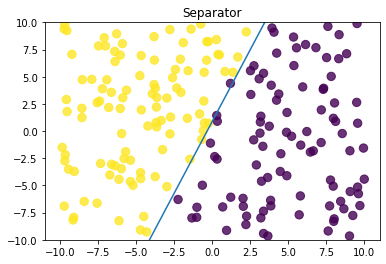

In [6]:
# x-coordinates of the separator line
x = np.linspace(m,M,100)
# corresponding y-coordinates of the separator line
y = -(wl[0]/wl[1]) *x - (bl/wl[1])

fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],s=70, c=labels, alpha=0.8)
ax.plot(x,y)
ax.set_title('Separator')
plt.ylim([m,M])
plt.show()

In [8]:
# compute the absolute distance between the true slope of the separator and the computed one, and for the intercept
print(np.abs(a-(-wl[0]/wl[1]))) # difference between true slope and predicted one
print(np.abs(b-(-bl/wl[1]))) # bias

0.4273699388716601
0.48755623011423144


### Ready-made functions for the Perceptron
- [Scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [9]:
from sklearn import linear_model

perc = linear_model.Perceptron()
# Fit linear model with Stochastic Gradient Descent
perc.fit(X, labels)

# extract weights and bias
wperc = perc.coef_[0]
bperc = perc.intercept_[0]
print(wperc)
print(bperc)

[-27.57195437   7.49760703]
0.0


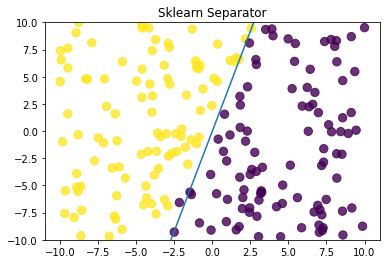

In [10]:
# x-coordinates of the separator line
x = np.linspace(m,M,100)
# corresponding y-coordinates of the separator line
y = -wperc[0]/wperc[1] *x - (bperc/wperc[1])

fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],s=70, c=labels, alpha=0.8)
ax.plot(x,y)
ax.set_title('Sklearn Separator')
plt.ylim([m,M])
plt.show()


## Linear Support Vector Machines

see also: https://ee227c.github.io/code/lecture4.html



Suppose we have a linear classification problem with data $(x_{i},y_{i})^{M}_{i=1}$  and we wish to find a hyperplane 
determined  by the vector $w$ such that

$$
w^{T}x\geq 1\;\;\;when\;\;\;y_{i}=1 \\
w^{T}x\leq -1\;\;\;when\;\;\;y_{i}=-1 
$$

By the theory we know that the smaller the norm $\|w\|$  the larger the margin between positive and negative instances. 
Therefore, it makes sense to throw in a regularizer that penalizes large norms. This leads to the objective.

$$
L(w)=\frac{1}{M}\sum_{i=1}^{M} \max(1−y_{i}(w^{T}x_{i}),0)+ \lambda \|w\|^{2}_{2}
$$

The hinge loss function is not differentiable everywhere. Solution: subgradient optimisation!

In [11]:
# loss function
def hingeFunction(z):
    return np.maximum(1-z,0)


def hingesubgrad(z):
    g = np.zeros(z.shape)
    g[z < 1] = -1
    return g

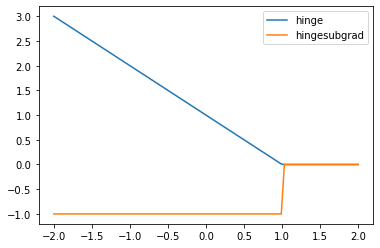

In [12]:
# Visualise these two functions
z = np.linspace(-2, 2, 100)
plt.plot(z, hingeFunction(z), label = 'hinge')
plt.plot(z, hingesubgrad(z), label = 'hingesubgrad')
plt.legend()

Now we can define our objective.

In [13]:
def ReghingeLoss(X,labels,w, lam):   # la funzione obiettivo
    d = np.shape(X)[0]
    L = np.mean(np.maximum(np.ones(d) - labels*(X@w), 0)) + lam * LA.norm(w,2) 
    return L

In [14]:
def svmGrad(X, labels, w, lam): # derivata della funzione obiettivo, che useremo nell'update dei pesi nel SVM
    g1 = hingesubgrad(np.diag(labels)@(X@w))
    g2 = np.diag(labels)@X
    return g1.dot(g2) + 2*lam*w

3. **Implement an SVM training function.**

In [15]:
def svm_training(X, labels, lam, Iter, gamma):
    # get dimensions
    d = np.shape(X)[1]
    # initialise weight vector and set first column to a random vector
    W = np.zeros((d,Iter))
    W[:,0] = np.random.normal(0,0.01,d)
    # initialise loss vector
    L = np.zeros(Iter)

    for i in range(Iter-1):
        # update weights using subgradient descent algorithm
        W[:,i+1] = W[:,i] - gamma * svmGrad(X, labels, W[:,i], lam)  # UPDATE dei pesi

        # save loss
        L[i] = ReghingeLoss(X,labels,W[:,i],lam)

    return W, L

In [16]:
W, L = svm_training(X, labels, lam=0, Iter=2000, gamma=0.0001)

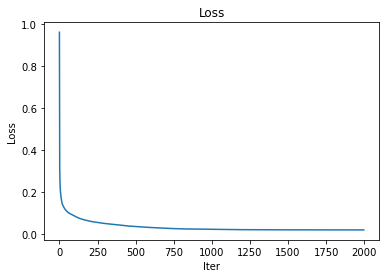

In [17]:
# plot loss

fig, ax = plt.subplots()
ax.plot(L[0:-2])
ax.set_title('Loss')
ax.set_xlabel('Iter')
ax.set_ylabel('Loss')

plt.show()

In [18]:
# get SVM's predictions
def predlabels(X, w):    
    return np.sign(X@w)

# calculate accuracy
def acc(labels, predlabels):
     return np.count_nonzero(labels == predlabels)/len(labels)   

In [19]:
pred = predlabels(X, W[:,-1])
acc(labels,pred)

0.995

In [20]:
# final weights
wl = W[:,-1]
print(wl)

[-1.75946471  0.58587276]


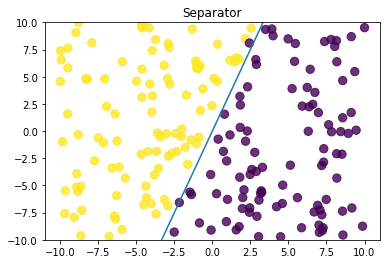

In [21]:
# x-coordinates of the separator line
x = np.linspace(m,M,100)
# corresponding y-coordinates of the separator line
y = -(wl[0]/wl[1]) *x 

fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],s=70, c=labels, alpha=0.8)
ax.plot(x,y)
ax.set_title('Separator')
plt.ylim([m,M])
plt.show()

### Ready-made functions for SVM
- [Scikit learn](https://scikit-learn.org/stable/modules/svm.html#classification)

Support Vector Classifiers

In [22]:
from sklearn.svm import LinearSVC

svc = LinearSVC().fit(X, labels)
svc.score(X, labels)

c:\Users\Erion\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.995

4. **Redo everything introducing noise in the labels**

In [23]:
import random

def noisybinary(a, b, points, m, M, d, rate):
    
    # create empty array of size (points, d), where each row represents a data point in d-dimensional space
    X = np.zeros((points,d))
    # create another empty array labels of size points, where each element represents the label of a data point (either 1 or -1)
    labels = np.zeros(points)
    
    # sample d-dimensional vectors uniformly from the range (m, M) 
    for i in range(points):
        X[i,:] = np.random.uniform(m, M, d)
    
    # For each data point, it computes the value of the function X[:,1]-a*X[:,0]-b, which represents the signed 
    # perpendicular distance of the point from the line.
    labels[X[:,1] - a*X[:,0] - b > 0] = 1 # above the line
    labels[X[:,1] - a*X[:,0] - b < 0] = -1 # below the line


    ########### now add noise! ###########
    # number of points whose labels will get noisy
    noisylen = int(points * rate)
    # get indexes of these points
    noisyidxs = random.sample(range(points), noisylen)

    for idx in noisyidxs:
        labels[idx] = labels[idx] * -1

    return X, labels  

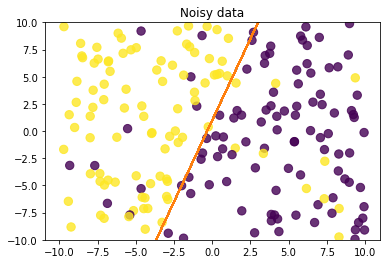

In [24]:
a = 3
b = 1
d = 2
points = 200
m = -10
M = 10

X, labels = noisybinary(a, b, points, m, M, d, 0.1)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=70, c=labels, alpha=0.8)
ax.plot(X, a*X+b)
plt.ylim([m, M])
ax.set_title('Noisy data')
plt.show()

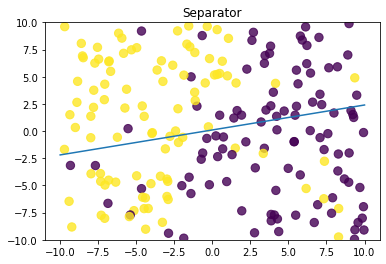

In [25]:
eta = 1
W, B = Perceptron(X,labels,eta)

# final weights
wl = W[:,-1]
bl = B[-1]

# x-coordinates of the separator line
x = np.linspace(m,M,100)
# corresponding y-coordinates of the separator line
y = -(wl[0]/wl[1]) *x - (bl/wl[1])

fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],s=70, c=labels, alpha=0.8)
ax.plot(x,y)
ax.set_title('Separator')
plt.ylim([m,M])
plt.show()

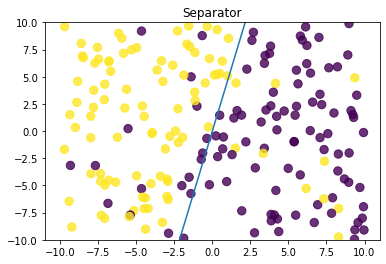

In [26]:
W, L = svm_training(X, labels, lam=0, Iter=100, gamma=0.0001)
# final weights
wl = W[:,-1]

# x-coordinates of the separator line
x = np.linspace(m,M,100)
# corresponding y-coordinates of the separator line
y = -(wl[0]/wl[1]) *x 

fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],s=70, c=labels, alpha=0.8)
ax.plot(x,y)
ax.set_title('Separator')
plt.ylim([m,M])
plt.show()